In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('indeed_salary_data.csv')

In [3]:
df.head()

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,Average_Salary,Min_Salary,Max_Salary,Max_SSalary,job_province,python_yn,R_yn,spark,aws,excel
0,Junior Data Scientist,"Ottawa, ON",Labour Market Information Council | Conseil de...,NaN,NaN,***LE FRANCAIS SUIT*** Position Title: Junior ...,NaN,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,1
1,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667 a year,We have several clients that have ongoing need...,year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,0,1
2,"Data Scientist, eComm","Toronto, ON",Flow Water,NaN,NaN,"Data Scientist, E-comm Position Overview Flo...",NaN,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,0,1
3,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000 a year,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,1
4,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000 a year,Deke is an expert media company. We are creati...,year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,0


In [4]:
df.drop_duplicates()

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,Average_Salary,Min_Salary,Max_Salary,Max_SSalary,job_province,python_yn,R_yn,spark,aws,excel
0,Junior Data Scientist,"Ottawa, ON",Labour Market Information Council | Conseil de...,NaN,NaN,***LE FRANCAIS SUIT*** Position Title: Junior ...,NaN,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,1
1,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667 a year,We have several clients that have ongoing need...,year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,0,1
2,"Data Scientist, eComm","Toronto, ON",Flow Water,NaN,NaN,"Data Scientist, E-comm Position Overview Flo...",NaN,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,0,1
3,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000 a year,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,1
4,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000 a year,Deke is an expert media company. We are creati...,year,0,0,0,NaN,NaN,NaN,NaN,ON,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Senior IoT Visualization Developer(UI Developer),"Toronto, ON",Epsilon solutions,NaN,50 - 55,Urgently hiring Senior IoT Visualization Devel...,hour,1,0,0,109200.0,104000.0,114400.0,NaN,ON,0,0,0,0,0
1870,systems architect,"Richmond Hill, ON","JVJ Holdings Co., Ltd.",NaN,48,Bachelor's degree 3 years to less than 5 years...,hour,1,0,0,99840.0,99840.0,99840.0,NaN,ON,1,0,0,0,1
1871,Full Time Licenced Security Guards for Securit...,"Toronto, ON",Paragon Security,3.4,17.25 - 19.61,Paragon Security provides service to this corp...,hour,1,0,0,38334.4,35880.0,40788.8,NaN,ON,0,0,0,0,0
1872,Part-Time Intern Analyst,"Toronto, ON",Synced Technology Inc.,NaN,15 - 20,Synced is a leading information service provid...,hour,1,0,0,36400.0,31200.0,41600.0,NaN,ON,0,0,0,0,1


In [5]:
df.columns

Index(['Title', 'Location', 'Company', 'Rating', 'Salary', 'Description',
       'salary_period', 'hourly', 'monthly', 'daily', 'Average_Salary',
       'Min_Salary', 'Max_Salary', 'Max_SSalary', 'job_province', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Title'].apply(title_simplifier)

In [20]:
df.job_simp.value_counts()

na                817
analyst           728
manager            95
data scientist     83
data engineer      80
mle                50
director           21
Name: job_simp, dtype: int64

In [21]:
df["seniority"] = df["Title"].apply(seniority)
df["seniority"].value_counts()

na        1378
senior     485
jr          11
Name: seniority, dtype: int64

In [22]:
df["desc_len"] = df["Description"].apply(lambda x: len(x))
df["desc_len"]

0       9709
1       2002
2       2591
3       6387
4       2589
        ... 
1869    1397
1870    1780
1871    2646
1872    2834
1873    2882
Name: desc_len, Length: 1874, dtype: int64

In [23]:
df.describe()

,Rating,hourly,monthly,daily,Average_Salary,Min_Salary,Max_Salary,Max_SSalary,python_yn,R_yn,spark,aws,excel,desc_len
count,1113.000000,1874.000000,1874.000000,1874.000000,192.000000,192.000000,184.000000,8.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,3.730548,0.054429,0.003202,0.008538,86090.847917,78175.900000,95769.960870,53430.000000,0.266809,0.003735,0.098186,0.186766,0.565635,4227.048559
std,0.449341,0.226923,0.056508,0.092030,39887.494720,38203.636121,43956.019822,11411.262607,0.442410,0.061019,0.297645,0.389828,0.495806,1926.324722
min,1.800000,0.000000,0.000000,0.000000,30000.000000,30000.000000,30000.000000,42120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000
25%,3.600000,0.000000,0.000000,0.000000,64562.500000,55000.000000,70166.500000,46410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2874.000000
50%,3.800000,0.000000,0.000000,0.000000,80680.250000,74516.000000,89834.400000,48750.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4050.500000
75%,4.000000,0.000000,0.000000,0.000000,97342.600000,89417.750000,111447.000000,57655.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5264.750000
max,5.000000,1.000000,1.000000,1.000000,382000.000000,380000.000000,384000.000000,74880.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15655.000000


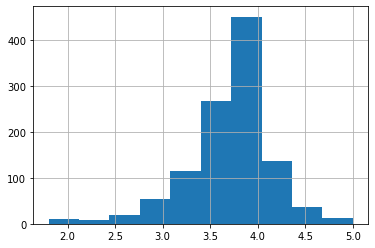

In [24]:
df.Rating.hist()

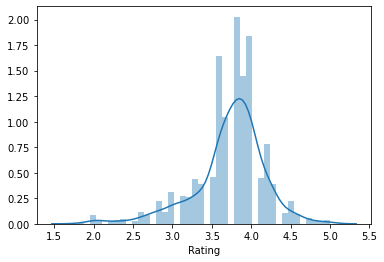

In [25]:
sns.distplot(df["Rating"])

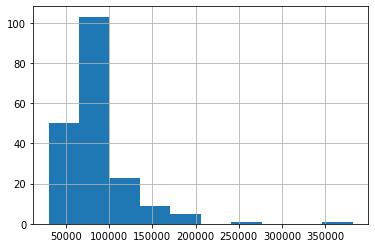

In [26]:
df.Average_Salary.hist()

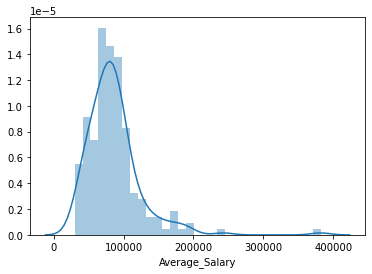

In [27]:
sns.distplot(df["Average_Salary"])

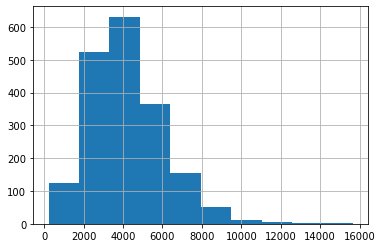

In [28]:
df.desc_len.hist()

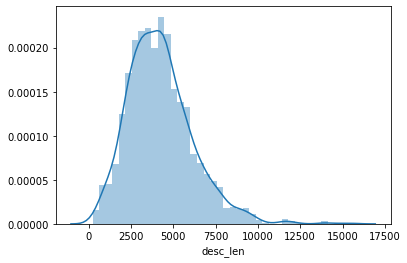

In [29]:
sns.distplot(df["desc_len"])

# Looking for Outliers

An outlier, also refered to as an anomalour, a spurious, rogue, wild or contaminated observation is a value that is far from the others that it appears to have come from a different population, and can occur for several different reasons. 

* Invalid data entry. 
* Random chance.
* Data collection mistakes.

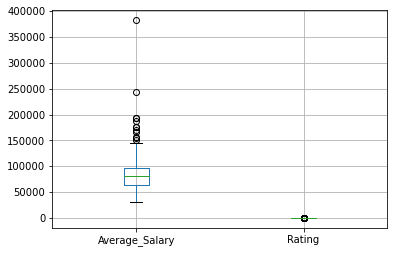

In [30]:
df.boxplot(column=['Average_Salary','Rating'])

C:\Users\Curtis Mindle\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Curtis Mindle\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


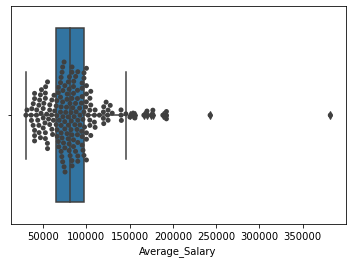

In [31]:
ax = sns.boxplot(x="Average_Salary", data=df)
ax = sns.swarmplot(x="Average_Salary", data=df, color=".25")

C:\Users\Curtis Mindle\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Curtis Mindle\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


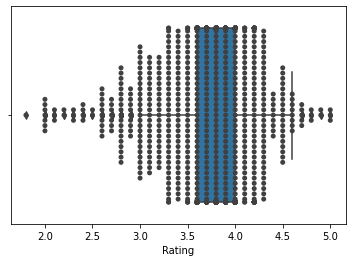

In [32]:
ax = sns.boxplot(x="Rating", data=df)
ax = sns.swarmplot(x="Rating", data=df, color=".25")

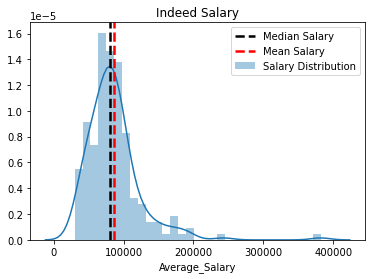

In [33]:
salary_plot = df[df["Average_Salary"].notnull()]

ax = sns.distplot(salary_plot["Average_Salary"], label="Salary Distribution").set_title("Indeed Salary")
plt.axvline(salary_plot["Average_Salary"].median(), lw=2.5, ls='dashed', color='black', label='Median Salary')
plt.axvline(salary_plot["Average_Salary"].mean(), lw=2.5, ls='dashed', color='red', label='Mean Salary')
plt.legend(labels=["Median Salary","Mean Salary", "Salary Distribution"])

## Calculating the interquartile range (IQR)

In order to calculate the IQR we take the fisrt quartile and subtract it from the third quartile (Q3 - Q1).

After this we will take the IQR and multiply it by a value (ideally it will be 1.5) that will decide the upper and lower bounds of what will define outliers.

In [34]:
from scipy.stats import iqr
x = salary_plot["Average_Salary"]
y = []
for i in x:
    y.append(i)
np.std(y)

salary_iqr = iqr(y,axis=0)

Q1 = np.quantile(y,0.25)
Q3 = np.quantile(y,0.75)
IQR = Q3-Q1

upper = Q3 + IQR*1.5
lower = Q1 - IQR*1.5

print("Q1: "+ str(Q1)+" Q3: "+str(Q3)+" IQR: "+str(IQR))
print("Upper = Q3 + IQR*1.5 = "+str(upper))
print("Lower = Q1 - IQR*1.5 = "+str(lower))

Q1: 64562.5 Q3: 97342.6 IQR: 32780.100000000006
Upper = Q3 + IQR*1.5 = 146512.75
Lower = Q1 - IQR*1.5 = 15392.349999999991


So from this information we would eliminate any data from where the salary is either above 147K or below 15K

In [36]:
salary_lower = salary_plot[salary_plot['Average_Salary'].apply(lambda x: x > 15392.349999999991)]
salary_higher = salary_plot[salary_plot['Average_Salary'].apply(lambda x: x < 146512.75)]

IQR_salary = salary_plot[salary_plot['Average_Salary'].apply(lambda x: 15392.349999999991 < x < 146512.75 )]

In [54]:
print(len(salary_lower["Average_Salary"]))
salary_lower["Average_Salary"].value_counts()

192


100000.0    6
90000.0     5
40000.0     5
70720.0     5
85000.0     4
           ..
52788.0     1
88108.8     1
61787.0     1
66040.0     1
30000.0     1
Name: Average_Salary, Length: 128, dtype: int64

In [55]:
print(len(salary_higher["Average_Salary"]))
salary_higher["Average_Salary"].value_counts()

180


100000.0    6
70720.0     5
40000.0     5
90000.0     5
83200.0     4
           ..
88108.8     1
61787.0     1
66040.0     1
67600.0     1
30000.0     1
Name: Average_Salary, Length: 117, dtype: int64

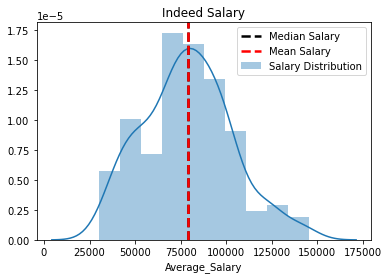

In [37]:
ax = sns.distplot(IQR_salary["Average_Salary"], label="Salary Distribution").set_title("Indeed Salary")
plt.axvline(IQR_salary["Average_Salary"].median(), lw=2.5, ls='dashed', color='black', label='Median Salary')
plt.axvline(IQR_salary["Average_Salary"].mean(), lw=2.5, ls='dashed', color='red', label='Mean Salary')
plt.legend(labels=["Median Salary","Mean Salary", "Salary Distribution"])

In [38]:
IQR_salary.head()

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,...,Max_SSalary,job_province,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len
1682,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667,We have several clients that have ongoing need...,year,0,0,0,...,NaN,ON,1,0,0,0,1,data scientist,na,2002
1683,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,...,NaN,ON,1,0,0,1,1,data scientist,na,6387
1685,Data Scientist,"Cambridge, ON",exactEarth Ltd.,NaN,92500,ABOUT US exactEarth is a data services company...,year,0,0,0,...,NaN,ON,1,0,1,0,1,data scientist,na,4977
1686,Data Scientist,"Concord, ON",SalesGrowth Development Inc.,NaN,30000,SalesGrowth Development is a dynamic business ...,year,0,0,0,...,NaN,ON,1,0,0,0,0,data scientist,na,1798
1687,Data Scientist/Machine Learning Engineer,"Toronto, ON",Staffinity Inc.,4.5,80000 - 120000,About Staffinity Inc. We are your trusted bili...,year,0,0,0,...,NaN,ON,0,0,0,1,0,data scientist,na,1979


## Using Z-Score

The z-score will allow us to measure how many standard deviations above or below the mean salary each individual salary is. 

To calculate the z-score we use the formula: z = (x – μ) / σ

In [39]:
from scipy import stats

salary_plot["z_score"] = stats.zscore(salary_plot['Average_Salary'])

<ipython-input-39-c59e2eec1da4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_plot["z_score"] = stats.zscore(salary_plot['Average_Salary'])


In [40]:
salary_plot = salary_plot.drop(columns='zscore_no_outlier')

KeyError: "['zscore_no_outlier'] not found in axis"

In [41]:
salary_plot.loc[salary_plot['z_score'].abs() <= 3]

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,...,job_province,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,z_score
1682,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667,We have several clients that have ongoing need...,year,0,0,0,...,ON,1,0,0,0,1,data scientist,na,2002,0.032517
1683,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,...,ON,1,0,0,1,1,data scientist,na,6387,-0.467301
1684,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000,Deke is an expert media company. We are creati...,year,0,0,0,...,ON,1,0,0,1,0,data scientist,senior,2589,2.109145
1685,Data Scientist,"Cambridge, ON",exactEarth Ltd.,NaN,92500,ABOUT US exactEarth is a data services company...,year,0,0,0,...,ON,1,0,1,0,1,data scientist,na,4977,0.161101
1686,Data Scientist,"Concord, ON",SalesGrowth Development Inc.,NaN,30000,SalesGrowth Development is a dynamic business ...,year,0,0,0,...,ON,1,0,0,0,0,data scientist,na,1798,-1.409903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Senior IoT Visualization Developer(UI Developer),"Toronto, ON",Epsilon solutions,NaN,50 - 55,Urgently hiring Senior IoT Visualization Devel...,hour,1,0,0,...,ON,0,0,0,0,0,na,senior,1397,0.580873
1870,systems architect,"Richmond Hill, ON","JVJ Holdings Co., Ltd.",NaN,48,Bachelor's degree 3 years to less than 5 years...,hour,1,0,0,...,ON,1,0,0,0,1,na,na,1780,0.345599
1871,Full Time Licenced Security Guards for Securit...,"Toronto, ON",Paragon Security,3.4,17.25 - 19.61,Paragon Security provides service to this corp...,hour,1,0,0,...,ON,0,0,0,0,0,analyst,na,2646,-1.200409
1872,Part-Time Intern Analyst,"Toronto, ON",Synced Technology Inc.,NaN,15 - 20,Synced is a leading information service provid...,hour,1,0,0,...,ON,0,0,0,0,1,analyst,na,2834,-1.249032


In [42]:
salary_plot["z_score_o"] = salary_plot["z_score"].apply(lambda x: 1 if x <= 3 else 0)

<ipython-input-42-6f6db60936b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_plot["z_score_o"] = salary_plot["z_score"].apply(lambda x: 1 if x <= 3 else 0)


In [43]:
salary_plot["z_score_o"].value_counts()

1    190
0      2
Name: z_score_o, dtype: int64

In [44]:
new_salary_plot = salary_plot[salary_plot["z_score_o"] == 1]

In [45]:
new_salary_plot

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,...,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,z_score,z_score_o
1682,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667,We have several clients that have ongoing need...,year,0,0,0,...,1,0,0,0,1,data scientist,na,2002,0.032517,1
1683,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,...,1,0,0,1,1,data scientist,na,6387,-0.467301,1
1684,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000,Deke is an expert media company. We are creati...,year,0,0,0,...,1,0,0,1,0,data scientist,senior,2589,2.109145,1
1685,Data Scientist,"Cambridge, ON",exactEarth Ltd.,NaN,92500,ABOUT US exactEarth is a data services company...,year,0,0,0,...,1,0,1,0,1,data scientist,na,4977,0.161101,1
1686,Data Scientist,"Concord, ON",SalesGrowth Development Inc.,NaN,30000,SalesGrowth Development is a dynamic business ...,year,0,0,0,...,1,0,0,0,0,data scientist,na,1798,-1.409903,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Senior IoT Visualization Developer(UI Developer),"Toronto, ON",Epsilon solutions,NaN,50 - 55,Urgently hiring Senior IoT Visualization Devel...,hour,1,0,0,...,0,0,0,0,0,na,senior,1397,0.580873,1
1870,systems architect,"Richmond Hill, ON","JVJ Holdings Co., Ltd.",NaN,48,Bachelor's degree 3 years to less than 5 years...,hour,1,0,0,...,1,0,0,0,1,na,na,1780,0.345599,1
1871,Full Time Licenced Security Guards for Securit...,"Toronto, ON",Paragon Security,3.4,17.25 - 19.61,Paragon Security provides service to this corp...,hour,1,0,0,...,0,0,0,0,0,analyst,na,2646,-1.200409,1
1872,Part-Time Intern Analyst,"Toronto, ON",Synced Technology Inc.,NaN,15 - 20,Synced is a leading information service provid...,hour,1,0,0,...,0,0,0,0,1,analyst,na,2834,-1.249032,1


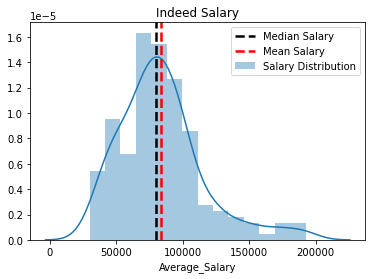

In [46]:
ax = sns.distplot(new_salary_plot["Average_Salary"], label="Salary Distribution").set_title("Indeed Salary")
plt.axvline(new_salary_plot["Average_Salary"].median(), lw=2.5, ls='dashed', color='black', label='Median Salary')
plt.axvline(new_salary_plot["Average_Salary"].mean(), lw=2.5, ls='dashed', color='red', label='Mean Salary')
plt.legend(labels=["Median Salary","Mean Salary", "Salary Distribution"])

## Data Smoothing

Lastly we can do data smoothing, which is a method of eliminating large spikes and outliers in a data set. This will help with summarizing the data while eliminating some of the noise from the data. 

The equation, for obtaining a smoothing value using exponential smoothing at any time t, is denoted by: St+1=αyt+(1−α)St, 0<α≤1 , t>0 Where alpha is a smoothing factor.

In [47]:
salary_plot['alpha_1']=salary_plot['Average_Salary'].ewm(alpha=0.1).mean()
salary_plot['alpha_2']=salary_plot['Average_Salary'].ewm(alpha=0.3).mean()
salary_plot['alpha_3']=salary_plot['Average_Salary'].ewm(alpha=0.6).mean()
salary_plot

<ipython-input-47-502dd17f66ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_plot['alpha_1']=salary_plot['Average_Salary'].ewm(alpha=0.1).mean()
<ipython-input-47-502dd17f66ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_plot['alpha_2']=salary_plot['Average_Salary'].ewm(alpha=0.3).mean()
<ipython-input-47-502dd17f66ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,...,aws,excel,job_simp,seniority,desc_len,z_score,z_score_o,alpha_1,alpha_2,alpha_3
1682,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667,We have several clients that have ongoing need...,year,0,0,0,...,0,1,data scientist,na,2002,0.032517,1,87384.500000,87384.500000,87384.500000
1683,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,...,1,1,data scientist,na,6387,-0.467301,1,76918.973684,75687.735294,73181.285714
1684,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000,Deke is an expert media company. We are creati...,year,0,0,0,...,1,0,data scientist,senior,2589,2.109145,1,111266.215867,118752.696347,135244.564103
1685,Data Scientist,"Cambridge, ON",exactEarth Ltd.,NaN,92500,ABOUT US exactEarth is a data services company...,year,0,0,0,...,0,1,data scientist,na,4977,0.161101,1,105809.334254,108388.426174,108924.019704
1686,Data Scientist,"Concord, ON",SalesGrowth Development Inc.,NaN,30000,SalesGrowth Development is a dynamic business ...,year,0,0,0,...,0,0,data scientist,na,1798,-1.409903,1,87297.128385,80120.990390,61079.681862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Senior IoT Visualization Developer(UI Developer),"Toronto, ON",Epsilon solutions,NaN,50 - 55,Urgently hiring Senior IoT Visualization Devel...,hour,1,0,0,...,0,0,na,senior,1397,0.580873,1,104745.018020,113671.423471,115782.368489
1870,systems architect,"Richmond Hill, ON","JVJ Holdings Co., Ltd.",NaN,48,Bachelor's degree 3 years to less than 5 years...,hour,1,0,0,...,0,1,na,na,1780,0.345599,1,104254.516217,109521.996430,106216.947396
1871,Full Time Licenced Security Guards for Securit...,"Toronto, ON",Paragon Security,3.4,17.25 - 19.61,Paragon Security provides service to this corp...,hour,1,0,0,...,0,0,analyst,na,2646,-1.200409,1,97662.504582,88165.717501,65487.418958
1872,Part-Time Intern Analyst,"Toronto, ON",Synced Technology Inc.,NaN,15 - 20,Synced is a leading information service provid...,hour,1,0,0,...,0,1,analyst,na,2834,-1.249032,1,91536.254113,72636.002251,48034.967583


In [48]:
df[['Average_Salary','Rating','desc_len']].corr()

,Average_Salary,Rating,desc_len
Average_Salary,1.000000,0.114633,-0.105458
Rating,0.114633,1.000000,0.136853
desc_len,-0.105458,0.136853,1.000000


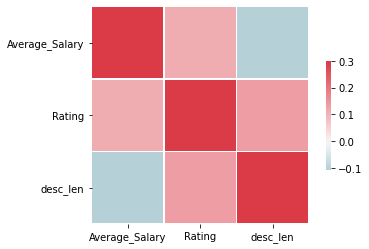

In [49]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Average_Salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Clearly adding in the description length was not worth while as there is no correlation between that and the average salary.

In [61]:
df_cat = df[['Location','Company','python_yn','R_yn','spark','aws','excel','job_simp']]

graph for Location: total = 71


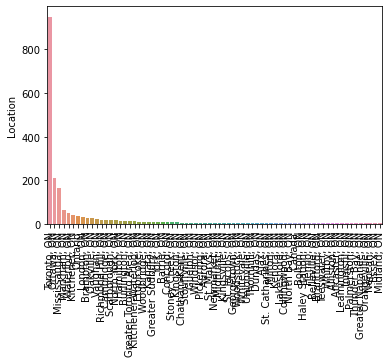

graph for Company: total = 916


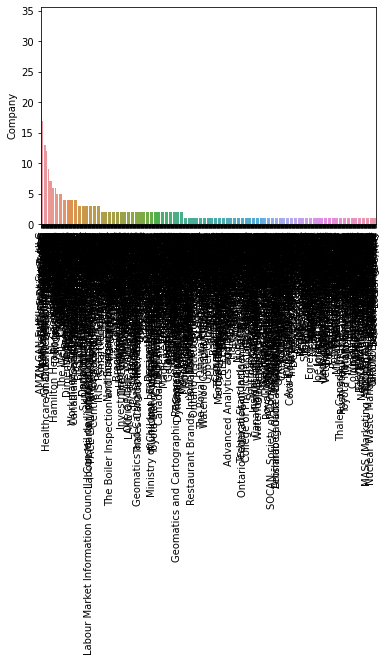

graph for python_yn: total = 2


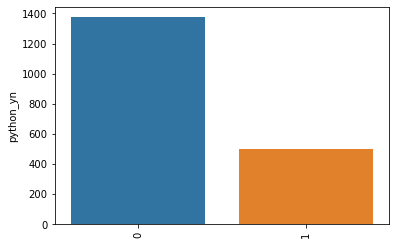

graph for R_yn: total = 2


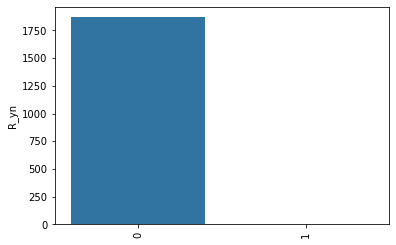

graph for spark: total = 2


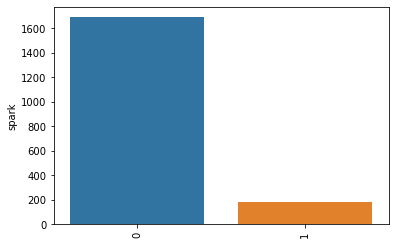

graph for aws: total = 2


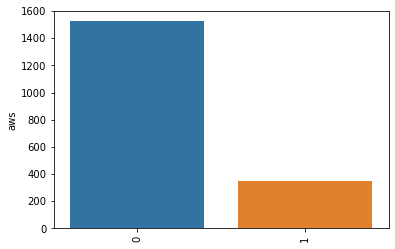

graph for excel: total = 2


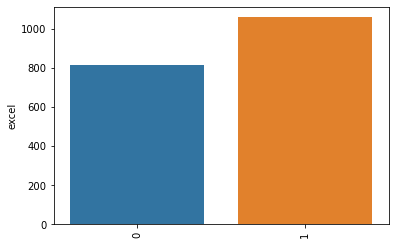

graph for job_simp: total = 7


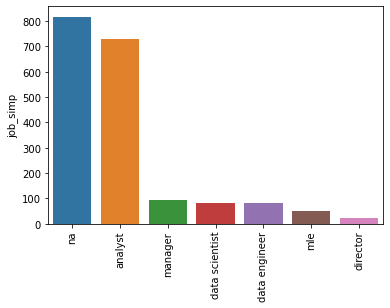

In [62]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


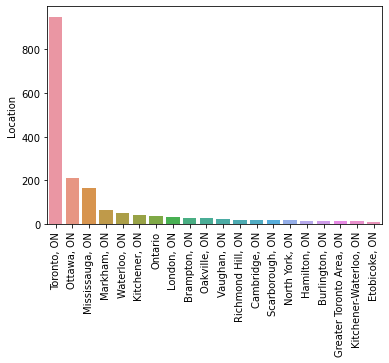

graph for Company: total = 20


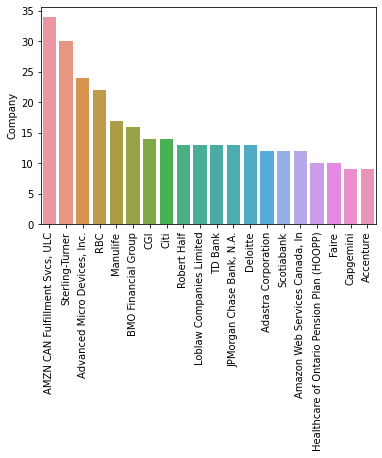

In [66]:
for i in df_cat[["Location",'Company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [52]:
pd.pivot_table(df, index = 'job_simp', values = 'Average_Salary')

,Average_Salary
job_simp,
analyst,78275.043750
data engineer,105379.700000
data scientist,92157.128571
manager,95310.000000
mle,140400.000000
na,92726.393056


In [53]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'Average_Salary')

Average_Salary
job_simp       seniority                
analyst        jr           40000.000000
               na           75667.631646
               senior       93541.331250
data engineer  na          101824.625000
               senior      119600.000000
data scientist na           86169.215385
               senior      170000.000000
manager        na          105066.666667
               senior       66040.000000
mle            na          140400.000000
na             jr          120000.000000
               na           85796.032759
               senior      121548.492308

In [54]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Average_Salary').sort_values('Location', ascending = False)

Average_Salary
Location                 job_simp                      
York, ON                 analyst           76080.000000
Woodstock, ON            analyst           52500.000000
Woodbridge, ON           analyst           70720.000000
Whitevale, ON            analyst           82500.000000
Waterloo, ON             na                91665.400000
                         analyst           79500.000000
Vaughan, ON              analyst           50000.000000
Unionville, ON           analyst           81120.000000
Toronto, ON              analyst           87026.892857
                         na               102705.951613
                         manager          113746.666667
                         data scientist   100000.000000
                         data engineer    112399.250000
St. Catharines, ON       analyst           70720.000000
Scarborough, ON          analyst           79040.000000
Richmond Hill, ON        na                85802.333333
                         analyst           70720.000000
Pickering, ON            na                94980.000000
Ottawa, ON               na                79002.861538
                         data scientist    91293.000000
                         data engineer     95000.000000
                         analyst           77202.125000
Ontario                  analyst           61787.000000
North York, ON           na                83200.000000
                         analyst           83200.000000
Newmarket, ON            analyst           88108.800000
Mississauga, ON          mle              140400.000000
                         na                86331.571429
                         manager           40000.000000
                         analyst           71567.307692
Midhurst, ON             na                89062.000000
Markham, ON              na                76960.000000
                         analyst           62983.000000
London, ON               na                90230.750000
                         data engineer    119600.000000
                         analyst           46000.000000
Kitchener-Waterloo, ON   na                75000.000000
                         data engineer     87500.000000
Kitchener, ON            na               166400.000000
                         analyst           63250.000000
Kingston, ON             data scientist    67500.000000
Kenora, ON               analyst           72788.000000
Hamilton, ON             data scientist    81910.400000
                         analyst           84302.400000
                         na                97200.000000
Greater Toronto Area, ON na                90000.000000
                         analyst           65000.000000
Greater Sudbury, ON      analyst           54152.800000
Etobicoke, ON            analyst           69992.000000
Concord, ON              data scientist    30000.000000
Collingwood, ON          data scientist   170000.000000
Cambridge, ON            data scientist    92500.000000
                         analyst           72500.000000
Burlington, ON           na                66225.500000
Brampton, ON             analyst           70360.000000
Barrie, ON               na                47500.000000
Aurora, ON               na                95000.000000
Ajax, ON                 analyst           80360.500000

In [55]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Average_Salary', aggfunc = 'count').sort_values('Location', ascending = False)

Average_Salary
Location       job_simp                
York, ON       na                     0
               analyst                2
Woodstock, ON  analyst                1
Woodbridge, ON na                     0
               analyst                2
...                                 ...
Barrie, ON     na                     1
Aurora, ON     na                     1
Ancaster, ON   na                     0
Alliston, ON   analyst                0
Ajax, ON       analyst                1

[157 rows x 1 columns]

In [56]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'Average_Salary').sort_values('Average_Salary', ascending = False)

,Average_Salary
Location,
"Collingwood, ON",170000.0
"Toronto, ON",100000.0
"Cambridge, ON",92500.0
"Ottawa, ON",91293.0
"Hamilton, ON",81910.4
"Kingston, ON",67500.0
"Concord, ON",30000.0


In [57]:
df_pivots = df[['Rating','hourly', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Average_Salary']]

In [58]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Average_Salary').sort_values('Average_Salary', ascending = False))

Rating
        Average_Salary
Rating                
3.6      126100.000000
4.5       93840.125000
4.2       85462.984615
4.3       84134.240000
3.5       83474.800000
4.1       83304.000000
4.0       83293.125000
4.4       81283.750000
3.3       78783.500000
3.9       78254.285714
3.8       77884.925000
2.6       75000.000000
3.1       72500.000000
4.7       52500.000000
3.7       50000.000000
3.4       45417.200000
hourly
        Average_Salary
hourly                
0         86247.163121
1         85658.682353
python_yn
           Average_Salary
python_yn                
1            91552.900000
0            84787.003226
R_yn
      Average_Salary
R_yn                
0       86090.847917
spark
       Average_Salary
spark                
1       104374.909091
0        84979.661878
aws
     Average_Salary
aws                
1      96755.869565
0      84639.395266
excel
       Average_Salary
excel                
0        87833.645679
1        84819.076577
Average_Salary


ValueError: Grouper for 'Average_Salary' not 1-dimensional

In [59]:
df = df.drop(columns='Max_SSalary')

In [60]:
df.head()

,Title,Location,Company,Rating,Salary,Description,salary_period,hourly,monthly,daily,...,Max_Salary,job_province,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len
0,Junior Data Scientist,"Ottawa, ON",Labour Market Information Council | Conseil de...,NaN,NaN,***LE FRANCAIS SUIT*** Position Title: Junior ...,NaN,0,0,0,...,NaN,ON,1,0,0,1,1,data scientist,na,9709
1,Data Scientist - Contract,"Ottawa, ON",The Well - Creative Consultants,NaN,60102 - 114667 a year,We have several clients that have ongoing need...,year,0,0,0,...,NaN,ON,1,0,0,0,1,data scientist,na,2002
2,"Data Scientist, eComm","Toronto, ON",Flow Water,NaN,NaN,"Data Scientist, E-comm Position Overview Flo...",NaN,0,0,0,...,NaN,ON,1,0,0,0,1,data scientist,na,2591
3,Data Scientist,"Kingston, ON",DocuPet,NaN,60000 - 75000 a year,"DocuPet, the foremost provider of outsourced p...",year,0,0,0,...,NaN,ON,1,0,0,1,1,data scientist,na,6387
4,"Sr. Data Scientist, Machine Learning","Collingwood, ON",Deke Digital,NaN,160000 - 180000 a year,Deke is an expert media company. We are creati...,year,0,0,0,...,NaN,ON,1,0,0,1,0,data scientist,senior,2589


In [67]:
df.columns

Index(['Title', 'Location', 'Company', 'Rating', 'Salary', 'Description',
       'salary_period', 'hourly', 'monthly', 'daily', 'Average_Salary',
       'Min_Salary', 'Max_Salary', 'job_province', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')